## 0. Preparation

In [1]:
import random
import time
import numpy as np
import matplotlib.pyplot as plt

## Task 1

**Implementing selection sort, insertion sort, merge sort and quick sort in ascending order (6 pts)**

### Part I: Write a program with required components:

1. Given an array A of n real values, verify that A is sorted or unsorted in ascending order. What is the running time complexity of your verifying algorithm in term of big-O notation in n? Explain your answer.

#### Part I: 1.1 Verify algorithm

In [2]:
# Verify algorithm
def isSorted(A):
    if all(A[i] <= A[i+1] for i in range(len(A) - 1)) == 1:
        return 'Array is ascending order'
    elif all(A[i] >= A[i+1] for i in range(len(A) - 1)) == 1:
        return 'Array is descending order'
    else:
        return 'Array is unsorted'

In [3]:
# Test
test_a = [1,3,5,7,9,11]
print(isSorted(test_a))
test_b = [10,8,6,4,2,0]
print(isSorted(test_b))
test_c = [1,10,3,8,5,6]
print(isSorted(test_c))

Array is ascending order
Array is descending order
Array is unsorted


When the length of the array A is "n", the first "if" statement will compare all elements in A, for a total of "n-1" times. If the condition is met, it will return, otherwise the next "elif" statement will be executed. The "elif" statement also compares all elements in A, for a total of "n-1" times. If the condition is met, it will return, otherwise the last "else" statement will be executed. So the time complexity of this algorithm is O(n).

2. Implement sorting algorithms: selection sort, insertion sort, merge sort and quick sort. For each sorting algorithms, output the number of comparisons used.
3. Given a parameter n, generate an array of n random real values in [0,1]. Run the 4 implemented sorting algorithms. For each algorithm, you need to (1) verify the sorted output, (2) report the number of comparisons, and (3) report the running time in milliseconds.

#### Part I: 2.1 Selection Sort

In [4]:
# Here we assume n=1000 for testing purposes
array = [random.uniform(0,1) for i in range(1000)]
print('(0) Before sorting:', isSorted(array))

# Counter reset to zero
count = 0
run_time = 0
sorted_array = []

# Selection Sort
def selectionSort(array):
    global count
    for i in range(len(array) - 1):
        min_index = i
        for j in range(i + 1, len(array)):
            count=count+1
            if array[j] < array[min_index]:
                min_index = j
        array[i], array[min_index] = array[min_index], array[i]
    return array

# Record start time
start_time = time.time()

sorted_array = selectionSort(array)

# Running time = start time - current time
run_time= (time.time()-start_time)*1000

# Output
print('(1) After sorting:', isSorted(sorted_array))
print('(2) Number of comparisons:', count)
print('(3) Running time:', run_time, 'ms')

(0) Before sorting: Array is unsorted
(1) After sorting: Array is ascending order
(2) Number of comparisons: 499500
(3) Running time: 82.77726173400879 ms


#### Part I: 2.2 Insertion Sort

In [5]:
# Here we assume n=1000 for testing purposes
array = [random.uniform(0,1) for i in range(1000)]
print('(0) Before sorting:', isSorted(array))

# Counter reset to zero
count = 0
run_time = 0
sorted_array = []

# Insertion Sort
def insertionSort(array):
    global count
    for i in range(1, len(array)):
        temp = array[i]
        j = i - 1
        count=count+1
        while array[j] > temp and j >=0:
            count=count+1
            array[j+1] = array[j]
            j = j - 1
        array[j+1] = temp
    return array

# Record start time
start_time = time.time()

sorted_array = insertionSort(array)

# Running time = start time - current time
run_time= (time.time()-start_time)*1000

# Output
print('(1) After sorting:', isSorted(sorted_array))
print('(2) Number of comparisons:', count)
print('(3) Running time:', run_time, 'ms')

(0) Before sorting: Array is unsorted
(1) After sorting: Array is ascending order
(2) Number of comparisons: 255024
(3) Running time: 59.84139442443848 ms


#### Part I: 2.3 Merge Sort

In [6]:
# Here we assume n=1000 for testing purposes
array = [random.uniform(0,1) for i in range(1000)]
print('(0) Before sorting:', isSorted(array))

# Counter reset to zero
count = 0
run_time = 0
sorted_array = []

# Merge Sort
def mergeSort(arr):

    if len(arr) <= 1:
        return arr

    m = len(arr) // 2
    L = mergeSort(arr[:m])
    R = mergeSort(arr[m:])
    return merge(L,R)

def merge(L,R):

    global count
    newArr = []
    i = 0
    j = 0
    
    while i < len(L) and j < len(R):
        if L[i] <= R[j]:
            count=count+1
            newArr.append(L[i])
            i += 1
        else:
            count=count+1
            newArr.append(R[j])
            j += 1

    newArr += L[i:]
    newArr += R[j:]
    return newArr

# Record start time
start_time = time.time()

sorted_array = mergeSort(array)

# Running time = start time - current time
run_time= (time.time()-start_time)*1000

# Output
print('(1) After sorting:', isSorted(sorted_array))
print('(2) Number of comparisons:', count)
print('(3) Running time:', run_time, 'ms')

(0) Before sorting: Array is unsorted
(1) After sorting: Array is ascending order
(2) Number of comparisons: 8698
(3) Running time: 5.984783172607422 ms


#### Part I: 2.4 Quick Sort

In [7]:
# Here we assume n=1000 for testing purposes
array = [random.uniform(0,1) for i in range(1000)]
print('(0) Before sorting:', isSorted(array))

# Counter reset to zero
count = 0
run_time = 0
sorted_array = []

# Quick Sort
def partition(array, l, r):
    global count
    pivot = array[r]
    i = l - 1
    for j in range(l, r):
        count=count+1
        if array[j] <= pivot:
            i += 1
            array[i], array[j] = array[j], array[i]
    array[i + 1], array[r] = array[r], array[i+1]
    return i + 1

def quickSort(array, l, r):
    if l < r:
        q = partition(array, l, r)
        quickSort(array, l, q-1)
        quickSort(array, q+1, r)
    return array

# Record start time
start_time = time.time()

sorted_array = quickSort(array, 0, len(array)-1)

# Running time = start time - current time
run_time= (time.time()-start_time)*1000

# Output
print('(1) After sorting:', isSorted(sorted_array))
print('(2) Number of comparisons:', count)
print('(3) Running time:', run_time, 'ms')

(0) Before sorting: Array is unsorted
(1) After sorting: Array is ascending order
(2) Number of comparisons: 10536
(3) Running time: 3.9894580841064453 ms


It can be seen from the above results that, under the same data size, selection sort requires the most comparisons and has the longest running time, followed by insertion sort. In contrast, merge sort and quick sort require fewer comparisons and running time.

### Part II: Using your written program to execute the following tasks.

1. We test the efficiency and accuracy of our implementations as follows. For n ∈ {10^3, 10^4, . . . , 10^6}, generate an array of n random values in [0,1]. Run the implementation of 4 sorting algorithms above, and for each algorithm, return the number of comparisons and the running time.

#### Part II: 1.1 Selection Sort

In [8]:
n = [1e3,1e4,1e5]

# Create arrays to store the results
COUNT=[]
RUN_TIME=[]
B_S=[]
A_S=[]

for i in n:
    A = [random.uniform(0,1) for j in range(int(i))]
    B_S.append(isSorted(A))
    
    # Counter reset to zero
    count = 0
    run_time = 0
    sorted_array = []
    
    # Record start time
    start_time = time.time()
    
    sorted_array = selectionSort(A)

    # Running time = start time - current time
    run_time= (time.time()-start_time)*1000

    A_S.append(isSorted(sorted_array))
    COUNT.append(count)
    RUN_TIME.append(run_time)
    
print('(0) Before sorting:', B_S)
print('(1) After sorting:', A_S)
print('(2) Number of comparisons:', COUNT)
print('(3) Running time:', RUN_TIME)

(0) Before sorting: ['Array is unsorted', 'Array is unsorted', 'Array is unsorted']
(1) After sorting: ['Array is ascending order', 'Array is ascending order', 'Array is ascending order']
(2) Number of comparisons: [499500, 49995000, 4999950000]
(3) Running time: [77.79312133789062, 7308.578729629517, 873655.9522151947]


#### Part II: 1.2 Insertion Sort

In [9]:
n = [1e3,1e4,1e5]

# Create arrays to store the results
COUNT=[]
RUN_TIME=[]
B_S=[]
A_S=[]

for i in n:
    A = [random.uniform(0,1) for j in range(int(i))]
    B_S.append(isSorted(A))
    
    # Counter reset to zero
    count = 0
    run_time = 0
    sorted_array = []
    
    # Record start time
    start_time = time.time()
    
    sorted_array = insertionSort(A)

    # Running time = start time - current time
    run_time= (time.time()-start_time)*1000

    A_S.append(isSorted(sorted_array))
    COUNT.append(count)
    RUN_TIME.append(run_time)
    
print('(0) Before sorting:', B_S)
print('(1) After sorting:', A_S)
print('(2) Number of comparisons:', COUNT)
print('(3) Running time:', RUN_TIME)

(0) Before sorting: ['Array is unsorted', 'Array is unsorted', 'Array is unsorted']
(1) After sorting: ['Array is ascending order', 'Array is ascending order', 'Array is ascending order']
(2) Number of comparisons: [249514, 24782022, 2503177744]
(3) Running time: [82.7796459197998, 8907.355070114136, 859897.7375030518]


#### Part II: 1.3 Merge Sort

In [10]:
n = [1e3,1e4,1e5,1e6]

# Create arrays to store the results
COUNT=[]
RUN_TIME=[]
B_S=[]
A_S=[]

for i in n:
    A = [random.uniform(0,1) for j in range(int(i))]
    B_S.append(isSorted(A))
    
    # Counter reset to zero
    count = 0
    run_time = 0
    sorted_array = []
    
    # Record start time
    start_time = time.time()
    
    sorted_array = mergeSort(A)

    # Running time = start time - current time
    run_time= (time.time()-start_time)*1000

    A_S.append(isSorted(sorted_array))
    COUNT.append(count)
    RUN_TIME.append(run_time)
    
print('(0) Before sorting:', B_S)
print('(1) After sorting:', A_S)
print('(2) Number of comparisons:', COUNT)
print('(3) Running time:', RUN_TIME)

(0) Before sorting: ['Array is unsorted', 'Array is unsorted', 'Array is unsorted', 'Array is unsorted']
(1) After sorting: ['Array is ascending order', 'Array is ascending order', 'Array is ascending order', 'Array is ascending order']
(2) Number of comparisons: [8689, 120437, 1536485, 18675379]
(3) Running time: [6.978511810302734, 84.77210998535156, 1029.2489528656006, 12545.483589172363]


#### Part II: 1.4 Quick Sort

In [11]:
n = [1e3,1e4,1e5,1e6]

# Create arrays to store the results
COUNT=[]
RUN_TIME=[]
B_S=[]
A_S=[]

for i in n:
    A = [random.uniform(0,1) for j in range(int(i))]
    B_S.append(isSorted(A))
    
    # Counter reset to zero
    count = 0
    run_time = 0
    sorted_array = []
    
    # Record start time
    start_time = time.time()
    
    sorted_array = quickSort(A, 0, len(A)-1)

    # Running time = start time - current time
    run_time= (time.time()-start_time)*1000

    A_S.append(isSorted(sorted_array))
    COUNT.append(count)
    RUN_TIME.append(run_time)
    
print('(0) Before sorting:', B_S)
print('(1) After sorting:', A_S)
print('(2) Number of comparisons:', COUNT)
print('(3) Running time:', RUN_TIME)

(0) Before sorting: ['Array is unsorted', 'Array is unsorted', 'Array is unsorted', 'Array is unsorted']
(1) After sorting: ['Array is ascending order', 'Array is ascending order', 'Array is ascending order', 'Array is ascending order']
(2) Number of comparisons: [10453, 162488, 2100716, 25569940]
(3) Running time: [2.9888153076171875, 51.86128616333008, 686.1636638641357, 8193.146228790283]


2. Repeat Step 1 10 times to get the average of number of comparisons and the average running time for each sorting algorithm.

#### Part II: 2.1 Selection Sort

In [15]:
n = [1e3,1e4]

# Create arrays to store the results
COUNT=[]
RUN_TIME=[]

for k in range(10):
    for i in n:
        A = [random.uniform(0,1) for j in range(int(i))]

        # Counter reset to zero
        count = 0
        run_time = 0
        sorted_array = []

        # Record start time
        start_time = time.time()

        sorted_array = selectionSort(A)

        # Running time = start time - current time
        run_time= (time.time()-start_time)*1000

        COUNT.append(count)
        RUN_TIME.append(run_time)

COUNTe3=COUNT[::2]
meanCOUNTe3=np.mean(COUNTe3)
COUNTe4=COUNT[1::2]
meanCOUNTe4=np.mean(COUNTe4)
COUNT_s=[meanCOUNTe3,meanCOUNTe4]
print('Mean of the number of comparisons:',COUNT_s)

RUN_TIMEe3=RUN_TIME[::2]
meanRUN_TIMEe3=np.mean(RUN_TIMEe3)
RUN_TIMEe4=RUN_TIME[1::2]
meanRUN_TIMEe4=np.mean(RUN_TIMEe4)
RUN_TIME_s=[meanRUN_TIMEe3,meanRUN_TIMEe4]
print('Mean of the running time:',RUN_TIME_s)

Mean of the number of comparisons: [499500.0, 49995000.0]
Mean of the running time: [107.91125297546387, 10414.930963516235]


#### Part II: 2.2 Insertion Sort

In [16]:
n = [1e3,1e4]

# Create arrays to store the results
COUNT=[]
RUN_TIME=[]

for k in range(10):
    for i in n:
        A = [random.uniform(0,1) for j in range(int(i))]
    
        # Counter reset to zero
        count = 0
        run_time = 0
        sorted_array = []
    
        # Record start time
        start_time = time.time()
    
        sorted_array = insertionSort(A)

        # Running time = start time - current time
        run_time= (time.time()-start_time)*1000

        COUNT.append(count)
        RUN_TIME.append(run_time)
        
COUNTe3=COUNT[::2]
meanCOUNTe3=np.mean(COUNTe3)
COUNTe4=COUNT[1::2]
meanCOUNTe4=np.mean(COUNTe4)
COUNT_i=[meanCOUNTe3,meanCOUNTe4]
print('Mean of the number of comparisons:',COUNT_i)

RUN_TIMEe3=RUN_TIME[::2]
meanRUN_TIMEe3=np.mean(RUN_TIMEe3)
RUN_TIMEe4=RUN_TIME[1::2]
meanRUN_TIMEe4=np.mean(RUN_TIMEe4)
RUN_TIME_i=[meanRUN_TIMEe3,meanRUN_TIMEe4]
print('Mean of the running time:',RUN_TIME_i)

Mean of the number of comparisons: [248624.7, 24980500.9]
Mean of the running time: [83.5057020187378, 8785.740995407104]


#### Part II: 2.3 Merge Sort

In [17]:
n = [1e3,1e4,1e5,1e6]

# Create arrays to store the results
COUNT=[]
RUN_TIME=[]

for k in range(10):
    for i in n:
        A = [random.uniform(0,1) for j in range(int(i))]
    
        # Counter reset to zero
        count = 0
        run_time = 0
        sorted_array = []
    
        # Record start time
        start_time = time.time()
    
        sorted_array = mergeSort(A)

        # Running time = start time - current time
        run_time= (time.time()-start_time)*1000

        COUNT.append(count)
        RUN_TIME.append(run_time)
    
COUNTe3=COUNT[::4]
meanCOUNTe3=np.mean(COUNTe3)
COUNTe4=COUNT[1::4]
meanCOUNTe4=np.mean(COUNTe4)
COUNTe5=COUNT[2::4]
meanCOUNTe5=np.mean(COUNTe5)
COUNTe6=COUNT[3::4]
meanCOUNTe6=np.mean(COUNTe6)
COUNT_m=[meanCOUNTe3,meanCOUNTe4,meanCOUNTe5,meanCOUNTe6]
print('Mean of the number of comparisons:',COUNT_m)

RUN_TIMEe3=RUN_TIME[::4]
meanRUN_TIMEe3=np.mean(RUN_TIMEe3)
RUN_TIMEe4=RUN_TIME[1::4]
meanRUN_TIMEe4=np.mean(RUN_TIMEe4)
RUN_TIMEe5=RUN_TIME[2::4]
meanRUN_TIMEe5=np.mean(RUN_TIMEe5)
RUN_TIMEe6=RUN_TIME[3::4]
meanRUN_TIMEe6=np.mean(RUN_TIMEe6)
RUN_TIME_m=[meanRUN_TIMEe3,meanRUN_TIMEe4,meanRUN_TIMEe5,meanRUN_TIMEe6]
print('Mean of the running time:',RUN_TIME_m)

Mean of the number of comparisons: [8703.9, 120449.1, 1536313.4, 18674051.5]
Mean of the running time: [6.581926345825195, 84.32629108428955, 1034.4664096832275, 12662.304949760437]


#### Part II: 2.4 Quick Sort

In [18]:
n = [1e3,1e4,1e5,1e6]

# Create arrays to store the results
COUNT=[]
RUN_TIME=[]

for k in range(10):
    for i in n:
        A = [random.uniform(0,1) for j in range(int(i))]
    
        # Counter reset to zero
        count = 0
        run_time = 0
        sorted_array = []
    
        # Record start time
        start_time = time.time()
    
        sorted_array = quickSort(A, 0, len(A)-1)

        # Running time = start time - current time
        run_time= (time.time()-start_time)*1000

        COUNT.append(count)
        RUN_TIME.append(run_time)

COUNTe3=COUNT[::4]
meanCOUNTe3=np.mean(COUNTe3)
COUNTe4=COUNT[1::4]
meanCOUNTe4=np.mean(COUNTe4)
COUNTe5=COUNT[2::4]
meanCOUNTe5=np.mean(COUNTe5)
COUNTe6=COUNT[3::4]
meanCOUNTe6=np.mean(COUNTe6)
COUNT_q=[meanCOUNTe3,meanCOUNTe4,meanCOUNTe5,meanCOUNTe6]
print('Mean of the number of comparisons:',COUNT_q)

RUN_TIMEe3=RUN_TIME[::4]
meanRUN_TIMEe3=np.mean(RUN_TIMEe3)
RUN_TIMEe4=RUN_TIME[1::4]
meanRUN_TIMEe4=np.mean(RUN_TIMEe4)
RUN_TIMEe5=RUN_TIME[2::4]
meanRUN_TIMEe5=np.mean(RUN_TIMEe5)
RUN_TIMEe6=RUN_TIME[3::4]
meanRUN_TIMEe6=np.mean(RUN_TIMEe6)
RUN_TIME_q=[meanRUN_TIMEe3,meanRUN_TIMEe4,meanRUN_TIMEe5,meanRUN_TIMEe6]
print('Mean of the running time:',RUN_TIME_q)

Mean of the number of comparisons: [10954.0, 155559.2, 2013570.5, 24502238.9]
Mean of the running time: [3.5904407501220703, 50.56486129760742, 676.2089490890503, 8069.023585319519]


3. Visualize the difference in term of number of comparisons and running time among 4 sorting algorithms. Plot the first graph where the x-axis is the value of n and the y-axis is the average number of comparisons. Plot the second graph where the x-axis is the value of n and the y-axis is the average running time. Note that each graph must have 4 lines, each line with different color corresponding to different algorithm. Explain your findings in both theoretical and practical aspects.

#### Part II: 3.1 Visualization of the Average Number of Comparisons

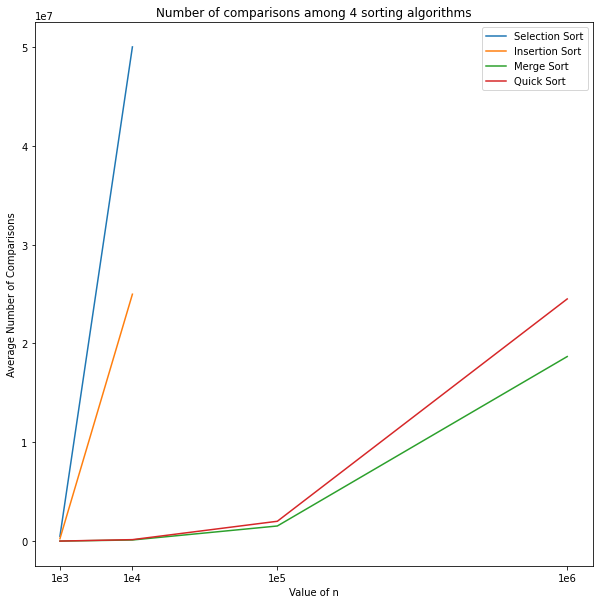

In [19]:
plt.figure(figsize=(10,10))
labels = ['1e3','1e4','1e5','1e6'] 
plt.xticks([1,2,4,8], labels)
plt.title("Number of comparisons among 4 sorting algorithms")
plt.xlabel("Value of n")
plt.ylabel("Average Number of Comparisons")

x1 = [1,2]
x2 = [1,2,4,8]
ys = COUNT_s
yi = COUNT_i
ym = COUNT_m
yq = COUNT_q

plt.plot(x1, ys, label='Selection Sort')
plt.plot(x1, yi, label='Insertion Sort')
plt.plot(x2, ym, label='Merge Sort')
plt.plot(x2, yq, label='Quick Sort')

plt.legend()
plt.show()

#### Part II: 3.2 Visualization of the Average Running Time

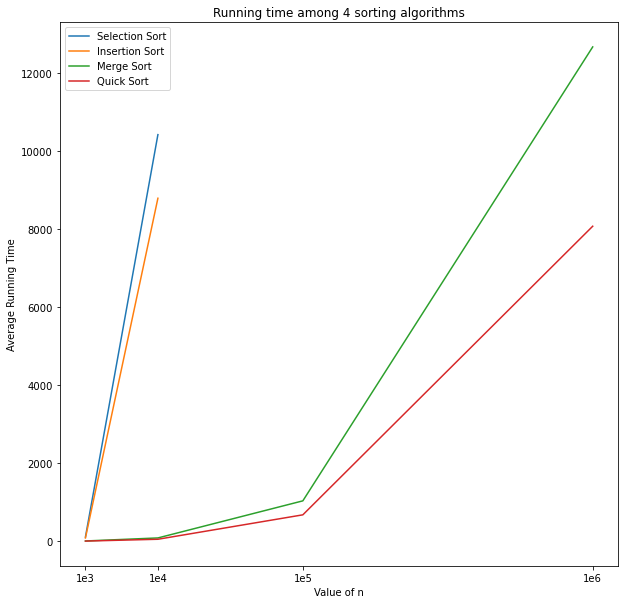

In [20]:
plt.figure(figsize=(10,10))
labels = ['1e3','1e4','1e5','1e6'] 
plt.xticks([1,2,4,8], labels)
plt.title("Running time among 4 sorting algorithms")
plt.xlabel("Value of n")
plt.ylabel("Average Running Time")
x1 = [1,2]
x2 = [1,2,4,8]
y_s = RUN_TIME_s
y_i = RUN_TIME_i
y_m = RUN_TIME_m
y_q = RUN_TIME_q

plt.plot(x1, y_s, label='Selection Sort')
plt.plot(x1, y_i, label='Insertion Sort')
plt.plot(x2, y_m, label='Merge Sort')
plt.plot(x2, y_q, label='Quick Sort')

plt.legend()
plt.show()

As we can see from the two figures above, selection sort has the highest number of comparisons and average running time, followed by insertion sort. When the amount of data has not yet reached 10^4, the number of comparisons and the average running time of these two algorithms have shown an exponential increase. In comparison, merge sort and quick sort perform very well. The above practical results also verify the theoretical time complexity of these four sorting algorithms.
- Selection Sort: O(n^2)
- Insertion Sort: O(n^2)
- Merge Sort: O(nlogn)
- Quick Sort: O(nlogn)

4. Compare the running time between your implementations with the built-in sort() function of the used programming language. Explain your finding.

#### Part II: 4.1 Built-in sort() function

In [29]:
n = [1e3,1e4,1e5,1e6]

# Create arrays to store the results
RUN_TIME=[]

for k in range(10):
    for i in n:
        A = [random.uniform(0,1) for j in range(int(i))]
    
        # Counter reset to zero
        run_time = 0

        # Record start time
        start_time = time.time()

        A.sort()

        # Running time = start time - current time
        run_time= (time.time()-start_time)*1000

        RUN_TIME.append(run_time)

RUN_TIMEe3=RUN_TIME[::4]
meanRUN_TIMEe3=np.mean(RUN_TIMEe3)
RUN_TIMEe4=RUN_TIME[1::4]
meanRUN_TIMEe4=np.mean(RUN_TIMEe4)
RUN_TIMEe5=RUN_TIME[2::4]
meanRUN_TIMEe5=np.mean(RUN_TIMEe5)
RUN_TIMEe6=RUN_TIME[3::4]
meanRUN_TIMEe6=np.mean(RUN_TIMEe6)
RUN_TIME_py=[meanRUN_TIMEe3,meanRUN_TIMEe4,meanRUN_TIMEe5,meanRUN_TIMEe6]
print('Mean of the running time:',RUN_TIME_py)

Mean of the running time: [0.19938945770263672, 1.4959335327148438, 20.046424865722656, 284.8376274108887]


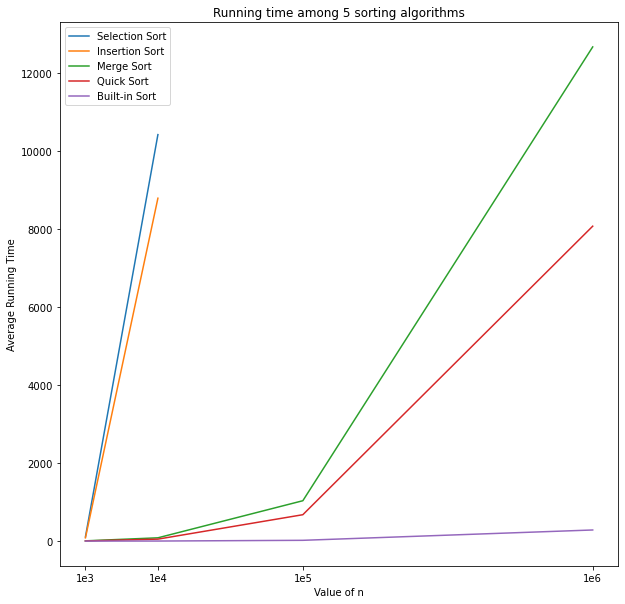

In [30]:
plt.figure(figsize=(10,10))
labels = ['1e3','1e4','1e5','1e6'] 
plt.xticks([1,2,4,8], labels)
plt.title("Running time among 5 sorting algorithms")
plt.xlabel("Value of n")
plt.ylabel("Average Running Time")
x1 = [1,2]
x2 = [1,2,4,8]
y_s = RUN_TIME_s
y_i = RUN_TIME_i
y_m = RUN_TIME_m
y_q = RUN_TIME_q
y_py= RUN_TIME_py

plt.plot(x1, y_s, label='Selection Sort')
plt.plot(x1, y_i, label='Insertion Sort')
plt.plot(x2, y_m, label='Merge Sort')
plt.plot(x2, y_q, label='Quick Sort')
plt.plot(x2, y_py,label='Built-in Sort')

plt.legend()
plt.show()

As shown in the above figure, python's built-in sorting algorithm is excellent, and its running time does not increase significantly even in the case of very large data volumes. After querying the Wiki, I learned that the built-in sorting algorithm of python is Timsort, which is a hybrid stable sorting algorithm derived from merge sort and insertion sort.

## Task 2

**Implementing heap sort in ascending order (2 pts)**

Write a program that implements heap sort in ascending order and uses your heap sort to sort an array of n random values in [0,1] for n ∈ {10^3, 10^4, . . . , 10^6}. Similar to Task 1, we visualize the difference in running time between heap sort, merge sort and quick sort by plotting a graph where the x-axis is the value of n and the y-axis is the average time of 10 runs. The graph must have 3 lines, each line with different color corresponding to different algorithm. Explain your findings in both theoretical and practical aspects.

In [43]:
# Heap Sort
def heapSort(array):
    first = len(array) // 2 - 1
    for start in range(first, -1, -1):
        heapify(array, start, len(array) - 1)
    
    for end in range(len(array) - 1, 0, -1):
        array[0], array[end] = array[end], array[0]
        heapify(array, 0, end - 1)
    return array

def heapify(array, start, end):
    root = start
    child = root * 2 + 1
    while child <= end:
        if child + 1 <= end and array[child] < array[child + 1]:
            child += 1
        
        if array[root] < array[child]:
            array[root], array[child] = array[child], array[root]
            root = child
            child = root * 2 + 1
        else:
            break

In [44]:
n = [1e3,1e4,1e5,1e6]

# Create arrays to store the results
RUN_TIME=[]

for k in range(10):
    for i in n:
        A = [random.uniform(0,1) for j in range(int(i))]

        # Counter reset to zero
        run_time = 0
        sorted_array = []
    
        # Record start time
        start_time = time.time()
    
        sorted_array = heapSort(A)

        # Running time = start time - current time
        run_time= (time.time()-start_time)*1000

        RUN_TIME.append(run_time)

RUN_TIMEe3=RUN_TIME[::4]
meanRUN_TIMEe3=np.mean(RUN_TIMEe3)
RUN_TIMEe4=RUN_TIME[1::4]
meanRUN_TIMEe4=np.mean(RUN_TIMEe4)
RUN_TIMEe5=RUN_TIME[2::4]
meanRUN_TIMEe5=np.mean(RUN_TIMEe5)
RUN_TIMEe6=RUN_TIME[3::4]
meanRUN_TIMEe6=np.mean(RUN_TIMEe6)
RUN_TIME_h=[meanRUN_TIMEe3,meanRUN_TIMEe4,meanRUN_TIMEe5,meanRUN_TIMEe6]
print('Mean of the running time:',RUN_TIME_h)

Mean of the running time: [4.985976219177246, 71.608567237854, 951.5005350112915, 12581.477403640747]


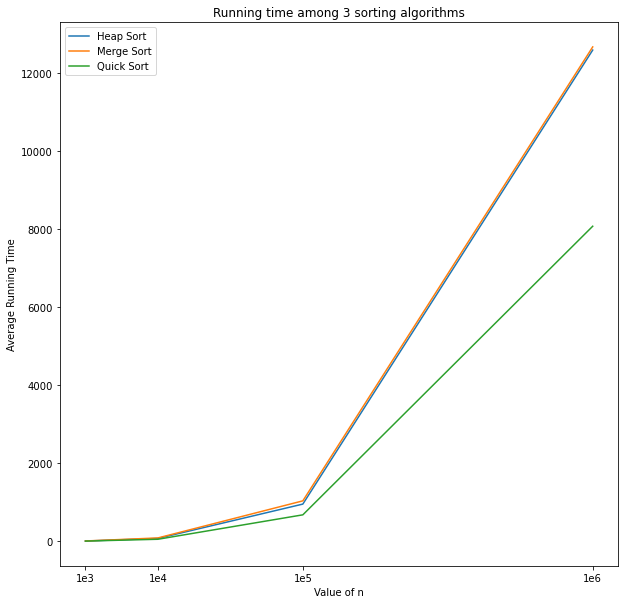

In [45]:
plt.figure(figsize=(10,10))
labels = ['1e3','1e4','1e5','1e6'] 
plt.xticks([1,2,4,8], labels)
plt.title("Running time among 3 sorting algorithms")
plt.xlabel("Value of n")
plt.ylabel("Average Running Time")

x = [1,2,4,8]
y_h = RUN_TIME_h
y_m = RUN_TIME_m
y_q = RUN_TIME_q

plt.plot(x, y_h, label='Heap Sort')
plt.plot(x, y_m, label='Merge Sort')
plt.plot(x, y_q, label='Quick Sort')

plt.legend()
plt.show()

As shown in the figure above, the average running time required by the heap sort, merge sort, and quick sort algorithms are not much different. Relatively speaking, quick sort requires less running time, but both heap sort and quick sort are unstable. The above practical results also verify that the theoretical time complexity of these three sorting algorithms is the same O(nlogn).

## Task 3

**Implementing radix sort in ascending order (2 pts)**

Write a program that implements the radix sort in ascending order and uses your radix sort to sort an array of n random integers in [0,10^9] for n ∈ {10^3, 10^4, . . . , 10^6}. Similar to Task 1, we visualize the difference in running time between radix sort, merge sort and quick sort by plotting a graph where the x-axis is the value of n and the y-axis is the average time of 10 runs. The graph must have 3 lines, each line with different color corresponding to different algorithm. Explain your findings in both theoretical and practical aspects.

In [46]:
# Radix sort
def radixSort(array):
    
    n = len(str(max(array)))
    for k in range(n):
        buckets = [[] for i in range(10)]
        for i in array:
            
            buckets[i//(10**k)%10].append(i)
        array=[j for i in buckets for j in i]
    return array

In [47]:
n = [1e3,1e4,1e5,1e6]

# Create arrays to store the results
RUN_TIME=[]

for k in range(10):
    for i in n:
        A = [random.randint(0,1e9) for j in range(int(i))]

        # Counter reset to zero
        run_time = 0
        sorted_array = []
    
        # Record start time
        start_time = time.time()
    
        sorted_array = radixSort(A)

        # Running time = start time - current time
        run_time= (time.time()-start_time)*1000

        RUN_TIME.append(run_time)

RUN_TIMEe3=RUN_TIME[::4]
meanRUN_TIMEe3=np.mean(RUN_TIMEe3)
RUN_TIMEe4=RUN_TIME[1::4]
meanRUN_TIMEe4=np.mean(RUN_TIMEe4)
RUN_TIMEe5=RUN_TIME[2::4]
meanRUN_TIMEe5=np.mean(RUN_TIMEe5)
RUN_TIMEe6=RUN_TIME[3::4]
meanRUN_TIMEe6=np.mean(RUN_TIMEe6)
RUN_TIME_r=[meanRUN_TIMEe3,meanRUN_TIMEe4,meanRUN_TIMEe5,meanRUN_TIMEe6]
print('Mean of the running time:',RUN_TIME_r)

Mean of the running time: [4.586887359619141, 45.32966613769531, 468.15505027770996, 5648.969674110413]


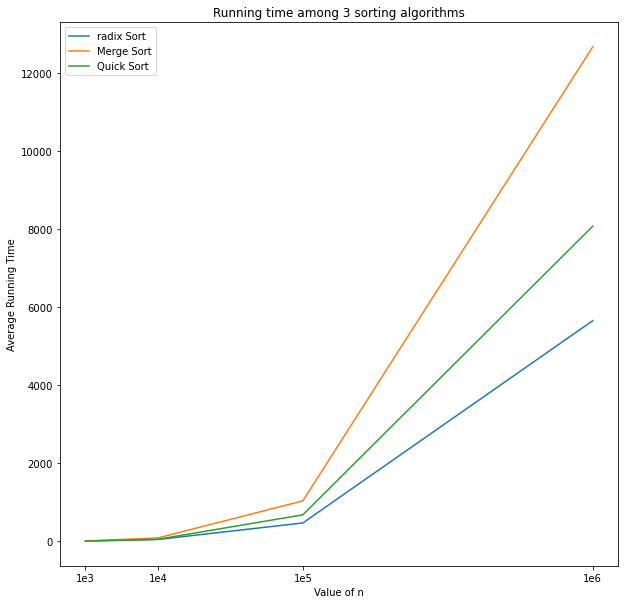

In [48]:
plt.figure(figsize=(10,10))
labels = ['1e3','1e4','1e5','1e6'] 
plt.xticks([1,2,4,8], labels)
plt.title("Running time among 3 sorting algorithms")
plt.xlabel("Value of n")
plt.ylabel("Average Running Time")

x = [1,2,4,8]
y_r = RUN_TIME_r
y_m = RUN_TIME_m
y_q = RUN_TIME_q

plt.plot(x, y_r, label='radix Sort')
plt.plot(x, y_m, label='Merge Sort')
plt.plot(x, y_q, label='Quick Sort')

plt.legend()
plt.show()

As shown in the above figure, among the three sorting algorithms, merge sort requires the longest average running time, followed by quick sort, and radix sort requires the least time. At the same time, both radix sort and merge sort are stable. The time complexity of radix sort is O(n*k), which is theoretically slightly better than O(nlogn) of merge sort and quick sort, which is also proved from practical results.